In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
session_data = pd.read_csv('../data/session-data.csv')


In [3]:
session_data.head(10)

,index_x,SongID,TimeStamp_Central,Performer_x,Album,Song_x,TimeStamp_UTC,index_y,Performer_y,Song_y,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,session_4_hour,session_id
0,0,Twenty Five MilesEdwin Starr,5/25/2021 5:18:00 PM,Edwin Starr,25 Miles,Twenty Five Miles,2021-05-25 23:18:00,9761,Edwin Starr,Twenty Five Miles,...,1.0,0.0607,0.0595,0.000015,0.2240,0.964,124.567,4.0,2021-05-25 20:00:00,3729
1,1,Devil's EyesGreyhounds,5/25/2021 5:15:00 PM,Greyhounds,Change of Pace,Devil's Eyes,2021-05-25 23:15:00,206,Greyhounds,Devil's Eyes,...,0.0,0.0456,0.3540,0.000414,0.0974,0.858,113.236,4.0,2021-05-25 20:00:00,3729
2,2,Pussy and PizzaMurs,5/25/2021 5:12:00 PM,Murs,Have a Nice Life,Pussy and Pizza,2021-05-25 23:12:00,6404,Murs,Pussy and Pizza,...,1.0,0.0659,0.0708,0.000004,0.0780,0.381,93.991,4.0,2021-05-25 20:00:00,3729
3,8,Our Special PlaceThe Heavy,5/25/2021 4:46:00 PM,The Heavy,Great Vengeance and Furious Fire,Our Special Place,2021-05-25 22:46:00,6205,The Heavy,Our Special Place,...,1.0,0.0386,0.2720,0.003610,0.0991,0.939,193.996,4.0,2021-05-25 20:00:00,3729
4,10,Make Peace and be FreePerfect Confusion,5/25/2021 4:39:00 PM,Perfect Confusion,Perfect Confusion,Make Peace and be Free,2021-05-25 22:39:00,6051,Perfect Confusion,Make Peace and be Free,...,1.0,0.0315,0.0138,0.000017,0.0649,0.431,78.037,4.0,2021-05-25 20:00:00,3729
5,11,Put It In The BoogieZach Deputy,5/25/2021 4:35:00 PM,Zach Deputy,Wash It in the Water,Put It In The Boogie,2021-05-25 22:35:00,1084,Zach Deputy,Put It In The Boogie,...,1.0,0.1100,0.0235,0.436000,0.1710,0.674,110.015,4.0,2021-05-25 20:00:00,3729
6,12,Saving GraceTom Petty,5/25/2021 3:59:00 PM,Tom Petty,Highway Companion,Saving Grace,2021-05-25 21:59:00,8984,Tom Petty,Saving Grace,...,1.0,0.0381,0.1370,0.000269,0.1300,0.791,142.287,4.0,2021-05-25 20:00:00,3729
7,25,Saving GraceTom Petty,5/25/2021 12:49:00 PM,Tom Petty,Highway Companion,Saving Grace,2021-05-25 18:49:00,8984,Tom Petty,Saving Grace,...,1.0,0.0381,0.1370,0.000269,0.1300,0.791,142.287,4.0,2021-05-25 16:00:00,3728
8,26,ParalyzerFinger Eleven,5/25/2021 12:46:00 PM,Finger Eleven,Them vs. You vs. Me (Deluxe Edition),Paralyzer,2021-05-25 18:46:00,6109,Finger Eleven,Paralyzer,...,0.0,0.0456,0.1570,0.000000,0.2330,0.861,106.031,4.0,2021-05-25 16:00:00,3728
9,27,StopPink Floyd,5/25/2021 12:45:00 PM,Pink Floyd,The Wall,Stop,2021-05-25 18:45:00,1532,Pink Floyd,Stop,...,0.0,0.0432,0.9170,0.001360,0.0658,0.309,76.112,4.0,2021-05-25 16:00:00,3728


In [4]:
print(session_data.columns)

Index(['index_x', 'SongID', 'TimeStamp_Central', 'Performer_x', 'Album',
       'Song_x', 'TimeStamp_UTC', 'index_y', 'Performer_y', 'Song_y',
       'spotify_genre', 'spotify_track_id', 'spotify_track_preview_url',
       'spotify_track_duration_ms', 'spotify_track_popularity',
       'spotify_track_explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'session_4_hour', 'session_id'],
      dtype='object')


In [39]:
import ast

array_genres = session_data['spotify_genre']

array_genres_filtered = []

for genre in array_genres:
    if isinstance(genre, str):
        try:
            parsed_genre = ast.literal_eval(genre)
            array_genres_filtered.append(parsed_genre)
        except (ValueError, SyntaxError):
            print(f"Skipping invalid genre: {genre}")
    elif isinstance(genre, list):
        array_genres_filtered.append(genre)
    elif isinstance(genre, float):
        array_genres_filtered.append(str(genre))
    else:
        print(f"Skipping unexpected type: {type(genre)}")

print(array_genres_filtered[1])

genre_df_new =[]

for genres in array_genres_filtered:
    for genre in genres:
        genre_df_new.append(genre)

# Create a DataFrame from the list of genres
genres_df = pd.DataFrame(genre_df_new, columns=['Genre'])

['deep new americana', 'funk']


In [40]:
def plot_training_data(df, column, n):
    value_counts = df[column].value_counts()
    top_n = value_counts.head(n)

    plt.figure(figsize=(10, 5))
    top_n.plot(kind='bar', color='skyblue')
    plt.title(f'Top {n} {column} values')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

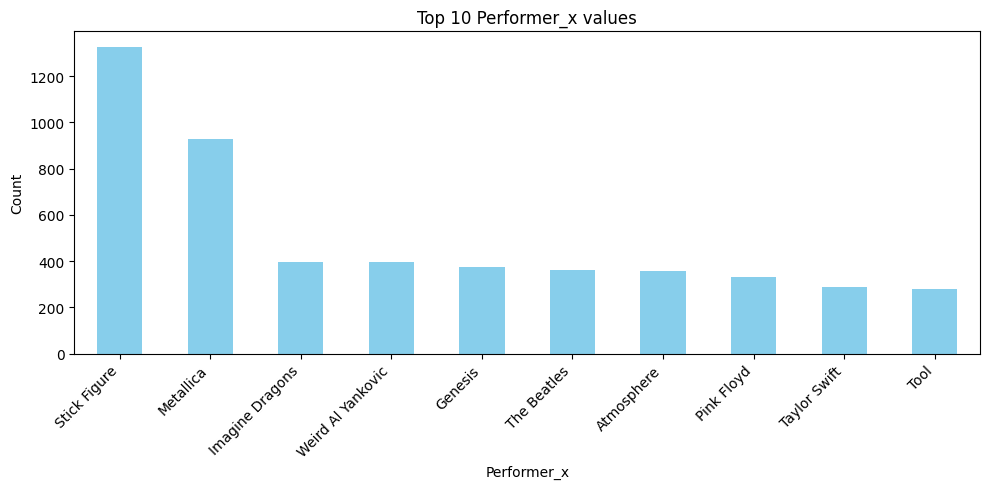

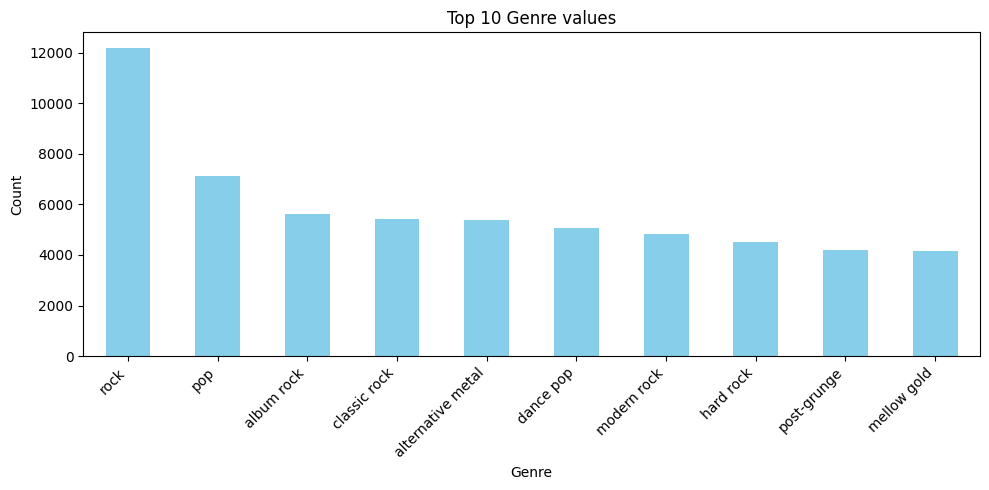

In [42]:
plot_training_data(session_data, "Performer_x", n=10)
plot_training_data(genres_df, "Genre", n=10)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33c5d346-6bff-45f7-af8d-4b44c857ba6b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>